In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1', end='2017-3-21')['Adj Close']

In [4]:
log_returns = np.log(1 + data.pct_change())

In [5]:
r = 0.025

In [6]:
stdev = log_returns.std() * 250 ** 0.5
stdev = stdev.values

In [7]:
T = 1.0
t_intervals = 250
delta_t = T / t_intervals
iterations = 10000

In [8]:
Z = np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0

In [9]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r-0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [12]:
S.shape

(251, 10000)

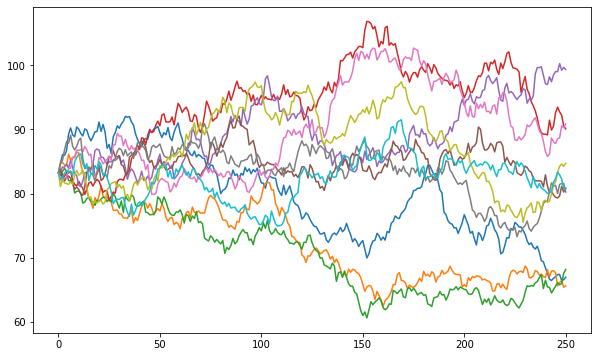

In [13]:
plt.figure(figsize=(10,6))
plt.plot(S[:, :10])

In [14]:
p = np.maximum(S[-1] - 110,0)
p

array([0., 0., 0., ..., 0., 0., 0.])

In [15]:
p.shape

(10000,)

In [16]:
C = np.exp(-r * T) * np.sum(p) / iterations
C

0.5433012342170711